In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
rt_xls = pd.ExcelFile('Data/rpt.00013061.0000000000000000.RTMLZHBSPP_2010.xlsx')
print(rt_xls.sheet_names)

rt = pd.concat(
    (pd.read_excel(rt_xls, sheet_name=s) for s in rt_xls.sheet_names),
    ignore_index=True
)

rt

['Dec_1']


,Delivery Date,Delivery Hour,Delivery Interval,Repeated Hour Flag,Settlement Point Name,Settlement Point Type,Settlement Point Price
0,12/01/2010,1,1,N,HB_BUSAVG,SH,25.08
1,12/01/2010,1,2,N,HB_BUSAVG,SH,23.19
2,12/01/2010,1,3,N,HB_BUSAVG,SH,23.59
3,12/01/2010,1,4,N,HB_BUSAVG,SH,22.23
4,12/01/2010,1,1,N,HB_HOUSTON,HU,25.08
...,...,...,...,...,...,...,...
41659,12/31/2010,24,4,N,LZ_SOUTH,LZ,25.18
41660,12/31/2010,24,1,N,LZ_WEST,LZ,26.41
41661,12/31/2010,24,2,N,LZ_WEST,LZ,25.58
41662,12/31/2010,24,3,N,LZ_WEST,LZ,25.80


In [4]:
zone = "LZ_HOUSTON"

rtm_z = rt[rt["Settlement Point Name"] == zone].copy()

In [5]:
rtm_z

,Delivery Date,Delivery Hour,Delivery Interval,Repeated Hour Flag,Settlement Point Name,Settlement Point Type,Settlement Point Price
32,12/01/2010,1,1,N,LZ_HOUSTON,LZ,25.08
33,12/01/2010,1,2,N,LZ_HOUSTON,LZ,23.20
34,12/01/2010,1,3,N,LZ_HOUSTON,LZ,23.45
35,12/01/2010,1,4,N,LZ_HOUSTON,LZ,22.17
88,12/01/2010,2,1,N,LZ_HOUSTON,LZ,21.96
...,...,...,...,...,...,...,...
41587,12/31/2010,23,4,N,LZ_HOUSTON,LZ,22.16
41640,12/31/2010,24,1,N,LZ_HOUSTON,LZ,26.41
41641,12/31/2010,24,2,N,LZ_HOUSTON,LZ,25.58
41642,12/31/2010,24,3,N,LZ_HOUSTON,LZ,25.80


In [6]:

mask_24 = rtm_z["Delivery Hour"] == 24
rtm_z.loc[mask_24, "Delivery Hour"] = 0
rtm_z.loc[mask_24, "Delivery Date"] = (
    pd.to_datetime(rtm_z.loc[mask_24, "Delivery Date"]) + pd.Timedelta(days=1)
).dt.strftime("%m/%d/%Y")

rtm_z["datetime"] = pd.to_datetime(
    rtm_z["Delivery Date"] + " " + rtm_z["Delivery Hour"].astype(str),
    format="%m/%d/%Y %H"
)

rtm_z = rtm_z.set_index("datetime").sort_index()
rtm_z = rtm_z.rename(columns={"Settlement Point Price": "RTM_15min"})

rtm_hourly = rtm_z["RTM_15min"].groupby("datetime").mean().to_frame("RTM")

In [7]:
rtm_hourly

,RTM
datetime,
2010-12-01 01:00:00,23.4750
2010-12-01 02:00:00,21.4675
2010-12-01 03:00:00,21.3100
2010-12-01 04:00:00,22.3500
2010-12-01 05:00:00,24.3925
...,...
2010-12-31 20:00:00,31.1775
2010-12-31 21:00:00,27.2700
2010-12-31 22:00:00,25.1375


In [8]:
# federal funds rate in december of 12/1/2010 is 0.18%
fed_funds_df = pd.read_csv('Data/FEDFUNDS.csv')
fed_funds_df

,observation_date,FEDFUNDS
0,10/1/2010,0.19
1,11/1/2010,0.19
2,12/1/2010,0.18


In [9]:
fed_funds_rate = fed_funds_df[fed_funds_df['observation_date'] == '12/1/2010']['FEDFUNDS'].values[0]
fed_funds_rate

0.18

In [10]:
import netCDF4

temp = netCDF4.Dataset('Data/texas_focused_weather.nc')



In [11]:
lat = np.asarray(temp.variables['latitude'])
lon = np.asarray(temp.variables['longitude'])
# temperature 2 meters above ground level
t2m = np.asarray(temp.variables['t2m']) # shape (time, lat, lon)

In [12]:
# time is in hours (31 * 24 = 744 hours)
t2m = t2m[-744:, :, :]  # last 744 hours of December 2010
t2m.shape 

(744, 24, 42)

In [13]:
# # taking the sub grid of interest (around Texas)
# temp_sub = t2m[:, 208:257, 1006:1064]
# temp_sub.shape

temp_sub = t2m
print(temp_sub.shape)

(744, 24, 42)


In [14]:
import yfinance as yf

data = yf.download(
    "SPY",
    start="2010-12-01",
    end="2011-01-01",
    interval="1d"
)
data


/tmp/ipykernel_1332/190695544.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2010-12-01,92.360115,92.535658,91.734255,91.741884,221037200
2010-12-02,93.543129,93.611824,92.451690,92.505117,191213600
2010-12-03,93.794991,93.901844,93.199662,93.222558,151288900
2010-12-06,93.695786,93.909493,93.497341,93.596560,103050500
2010-12-07,93.749229,94.649857,93.695803,94.596430,206581000
2010-12-08,94.092674,94.168997,93.428656,93.863705,138019200
2010-12-09,94.459038,94.657477,93.993459,94.619318,123705100
2010-12-10,95.008575,95.100161,94.436143,94.749070,117571700


In [15]:

ffr = np.full(744, fed_funds_rate, dtype=float)

# 2. Convert daily SPY data to hourly array of length 744


spy_daily = data["Close"]

idx = pd.date_range("2010-12-01", "2010-12-31 23:00", freq="H")



/tmp/ipykernel_1332/4257181674.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  idx = pd.date_range("2010-12-01", "2010-12-31 23:00", freq="H")


In [16]:
spy_daily

Ticker,SPY
Date,
2010-12-01,92.360115
2010-12-02,93.543129
2010-12-03,93.794991
2010-12-06,93.695786
2010-12-07,93.749229
2010-12-08,94.092674
2010-12-09,94.459038
2010-12-10,95.008575
2010-12-13,95.069633


We now have said data: rtm - (744), fed funds - (744), spy - (744), t2m - (744, 49, 58). I would like to predict the average real time value of electricity on the last day.

In [17]:
rtm_hourly.shape

(744, 1)

making it such that the weekend spy prices stay the same as the previous (market is closed on weekends)

In [18]:

spy_daily_full = spy_daily.asfreq("D").ffill()
idx = pd.date_range("2010-12-01", "2010-12-31", freq="D")
spy_daily_full = spy_daily.reindex(idx).ffill()

In [19]:
start = spy_daily_full.index.min()
end   = spy_daily_full.index.max()

idx_hourly = pd.date_range(start, end + pd.Timedelta(hours=23), freq="H")

spy_hourly = spy_daily_full.reindex(idx_hourly, method="ffill")
spy_hourly.shape

/tmp/ipykernel_1332/3564471548.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  idx_hourly = pd.date_range(start, end + pd.Timedelta(hours=23), freq="H")


(744, 1)

In [20]:
print(rtm_hourly.shape)
print(spy_hourly.shape)

print(temp_sub.shape)
print(ffr.shape)

(744, 1)
(744, 1)
(744, 24, 42)
(744,)


Having a Model which preserves Spatial Dimensions of T2M

In [21]:
import numpy as np
import pandas as pd

T = rtm_hourly.shape[0]  # 744 for one month
feature_cols = ["RT", "SPY", "FFR", "hour", "dow", "month"]

idx = pd.date_range("2010-12-01", periods=T, freq="H")  # adjust start

df_scalar = pd.DataFrame(index=idx)
df_scalar["RT"]   = rtm_hourly.squeeze()
df_scalar["SPY"]  = spy_hourly.squeeze()
df_scalar["FFR"]  = ffr.astype("float32")

# calendar features
df_scalar["hour"]  = df_scalar.index.hour
df_scalar["dow"]   = df_scalar.index.dayofweek
df_scalar["month"] = df_scalar.index.month


/tmp/ipykernel_1332/4271329016.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  idx = pd.date_range("2010-12-01", periods=T, freq="H")  # adjust start


In [22]:
mask_valid = ~df_scalar[feature_cols + ["RT"]].isna().any(axis=1)
df_scalar = df_scalar[mask_valid]
t2m_sub = temp_sub[mask_valid.to_numpy()]  # keep t2m in sync with time axis

In [23]:
df_scalar.head()

,RT,SPY,FFR,hour,dow,month
2010-12-01 01:00:00,23.4750,92.360115,0.18,1,2,12
2010-12-01 02:00:00,21.4675,92.360115,0.18,2,2,12
2010-12-01 03:00:00,21.3100,92.360115,0.18,3,2,12
2010-12-01 04:00:00,22.3500,92.360115,0.18,4,2,12
2010-12-01 05:00:00,24.3925,92.360115,0.18,5,2,12


In [24]:
H, W = temp_sub.shape[1], temp_sub.shape[2]

In [25]:
past_hours = 24
future_hours = 24


def make_supervised_spatiotemporal(df_scalar, t2m_grid, past_hours, future_hours, feature_cols):
    # df_scalar: DataFrame (T, n_scalar)
    # t2m_grid:  array (T, H, W)
    values = df_scalar[feature_cols].to_numpy().astype("float32")  # (T, n_scalar)
    rt     = df_scalar["RT"].to_numpy().astype("float32")          # (T,)
    
    T, n_scalar = values.shape # T is how many time steps we have
    H, W = t2m_grid.shape[1], t2m_grid.shape[2] #H and W are spatial dimensions
    
    X_grid_list = []
    X_seq_list  = []
    Y_list      = []

    # here we get samples by sliding a window over time (each step is a sample of data)
    
    for t in range(T - past_hours - future_hours + 1): # so we dont overshoot the time axis
        # temperature block
        grid_block = t2m_grid[t : t + past_hours]                 # (past_hours, H, W)
        grid_block = grid_block[..., np.newaxis]                  # (past_hours, H, W, 1)
        
        # scalar time-series block
        seq_block = values[t : t + past_hours]                    # (past_hours, n_scalar)
        
        # future RT prices
        future_rt = rt[t + past_hours : t + past_hours + future_hours]  # (24,)
        
        X_grid_list.append(grid_block)
        X_seq_list.append(seq_block)
        Y_list.append(future_rt)
    
    X_grid = np.stack(X_grid_list, axis=0)   # (n_samples, past_hours, H, W, 1)
    X_seq = np.stack(X_seq_list, axis=0)    # (n_samples, past_hours, n_scalar)
    Y = np.stack(Y_list, axis=0)        # (n_samples, future_hours)
    
    return X_grid, X_seq, Y

X_grid, X_seq, Y = make_supervised_spatiotemporal(
    df_scalar, temp_sub, past_hours, future_hours, feature_cols
)

print("X_grid:", X_grid.shape)  # (n_samples, 24, H, W, 1)
print("X_seq: ", X_seq.shape)   # (n_samples, 24, n_scalar)
print("Y:     ", Y.shape)       # (n_samples, 24)


X_grid: (696, 24, 24, 42, 1)
X_seq:  (696, 24, 6)
Y:      (696, 24)


In [26]:
from tensorflow.keras.layers import (
    Input, ConvLSTM2D, BatchNormalization, GlobalAveragePooling2D, Flatten,
    Conv1D, GlobalAveragePooling1D, Dense, Concatenate
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

n_scalar = X_seq.shape[2]
H, W = X_grid.shape[2], X_grid.shape[3]

# spatio-temporal grid branch
grid_in = Input(shape=(past_hours, H, W, 1), name="grid_input")
xg = ConvLSTM2D(
    filters=16,
    kernel_size=(3, 3),
    padding="same",
    activation="relu",
    return_sequences=False
)(grid_in)
xg = BatchNormalization()(xg)
xg = Flatten()(xg)
#xg = GlobalAveragePooling2D()(xg)   # -> (batch, 16)

# time series branch
seq_in = Input(shape=(past_hours, n_scalar), name="seq_input")
xs = Conv1D(filters=32, kernel_size=3, padding="causal", activation="relu")(seq_in)
xs = Conv1D(filters=32, kernel_size=3, padding="causal", activation="relu")(xs)
xs = GlobalAveragePooling1D()(xs)   # -> (batch, 32)

# combine
x = Concatenate()([xg, xs])         # (batch, 48)
x = Dense(64, activation="relu")(x)
x = Dense(64, activation="relu")(x)
out = Dense(future_hours, name="output")(x)   # 24-hour forecast

model = Model(inputs=[grid_in, seq_in], outputs=out)
model.compile(optimizer=Adam(1e-3), loss="mse", metrics=["mae"])
model.summary()


2025-12-01 16:16:13.739831: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-01 16:16:13.166054: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-01 16:16:13.315135: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-01 16:16:13.356437: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-01 16:16:13.643649: I tensorflow/core/platform/cpu_feature_guar

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ grid_input          │ (None, 24, 24,    │          0 │ -                 │
│ (InputLayer)        │ 42, 1)            │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ seq_input           │ (None, 24, 6)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_lstm2d         │ (None, 24, 42,    │      9,856 │ grid_input[0][0]  │
│ (ConvLSTM2D)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 24, 32)    │        608 │ seq_input[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 24, 42,    │         64 │ conv_lstm2d[0][0] │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 24, 32)    │      3,104 │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 16128)     │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 32)        │          0 │ conv1d_1[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 16160)     │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │  1,034,304 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      4,160 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 24)        │      1,560 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,053,656 (4.02 MB)

 Trainable params: 1,053,624 (4.02 MB)

 Non-trainable params: 32 (128.00 B)

In [27]:
split = int(len(X_grid) * 0.8)
Xg_train, Xg_test = X_grid[:split], X_grid[split:]
Xs_train, Xs_test = X_seq[:split],  X_seq[split:]
Y_train,  Y_test  = Y[:split],      Y[split:]

history = model.fit(
    [Xg_train, Xs_train], Y_train,
    validation_data=([Xg_test, Xs_test], Y_test),
    epochs=8,
    batch_size=4,
    verbose=1
)


Epoch 1/8


I0000 00:00:1764623779.150627    2049 service.cc:146] XLA service 0x7f048c010560 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764623779.150685    2049 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2025-12-01 16:16:19.225706: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-01 16:16:19.515419: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  7/139 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1439.2347 - mae: 29.8022

2025-12-01 16:16:23.579583: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'input_multiply_reduce_select_fusion_1', 232 bytes spill stores, 232 bytes spill loads

I0000 00:00:1764623783.591803    2049 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 1242.2400 - mae: 18.0131 - val_loss: 164.4765 - val_mae: 11.0631
Epoch 2/8
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 1147.5294 - mae: 10.7117 - val_loss: 104.0530 - val_mae: 8.0828
Epoch 3/8
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 984.7794 - mae: 10.6505 - val_loss: 82.3396 - val_mae: 6.0488
Epoch 4/8
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 878.7903 - mae: 9.6753 - val_loss: 110.4348 - val_mae: 8.4687
Epoch 5/8
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 1084.1426 - mae: 10.6142 - val_loss: 102.8850 - val_mae: 8.0855
Epoch 6/8
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 870.7120 - mae: 9.4776 - val_loss: 182.0969 - val_mae: 10.6882
Epoch 7/8
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 1210.9186 - mae: 10.9343 - val_loss: 91.6628 - val_mae: 7.4647
Epoch 8/8
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 1125.2908 - mae: 10.2106 - val_loss: 112.9858 - val_mae: 8.6014


In [28]:
last_grid_block = temp_sub[-past_hours:]              # (24, H, W)
last_grid_block = last_grid_block[..., np.newaxis]   # (24, H, W, 1)

last_seq_block = df_scalar[feature_cols].to_numpy().astype("float32")[-past_hours:]

Xg_last = np.expand_dims(last_grid_block, axis=0)    # (1, 24, H, W, 1)
Xs_last = np.expand_dims(last_seq_block,  axis=0)    # (1, 24, n_scalar)

next_24_forecast = model.predict([Xg_last, Xs_last])[0]  # shape (24,)
print("Next 24-hour forecast:", next_24_forecast)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Next 24-hour forecast: [30.617867 36.542397 30.653418 33.303787 33.471348 32.716904 36.20744
 32.05759  34.149426 33.65808  33.356594 30.812475 29.194662 27.929945
 34.71696  37.361263 28.557533 25.706932 28.715673 33.046787 32.1497
 30.999763 30.364143 33.92495 ]


# Checking the actual values

In [37]:
rt_2011_jan = pd.read_excel('Data/rpt.00013061.0000000000000000.RTMLZHBSPP_2011.xlsx', sheet_name='Jan_1')


In [38]:
zone = "LZ_HOUSTON"
rtm_z = rt_2011_jan[rt_2011_jan["Settlement Point Name"] == zone].copy()
rtm_z


,Delivery Date,Delivery Hour,Delivery Interval,Repeated Hour Flag,Settlement Point Name,Settlement Point Type,Settlement Point Price
32,01/01/2011,1,1,N,LZ_HOUSTON,LZ,25.11
33,01/01/2011,1,2,N,LZ_HOUSTON,LZ,23.45
34,01/01/2011,1,3,N,LZ_HOUSTON,LZ,24.07
35,01/01/2011,1,4,N,LZ_HOUSTON,LZ,22.29
88,01/01/2011,2,1,N,LZ_HOUSTON,LZ,22.33
...,...,...,...,...,...,...,...
41587,01/31/2011,23,4,N,LZ_HOUSTON,LZ,12.58
41640,01/31/2011,24,1,N,LZ_HOUSTON,LZ,15.45
41641,01/31/2011,24,2,N,LZ_HOUSTON,LZ,14.73
41642,01/31/2011,24,3,N,LZ_HOUSTON,LZ,14.28


In [39]:
mask_24 = rtm_z["Delivery Hour"] == 24
rtm_z.loc[mask_24, "Delivery Hour"] = 0
rtm_z.loc[mask_24, "Delivery Date"] = (
    pd.to_datetime(rtm_z.loc[mask_24, "Delivery Date"]) + pd.Timedelta(days=1)
).dt.strftime("%m/%d/%Y")

rtm_z["datetime"] = pd.to_datetime(
    rtm_z["Delivery Date"] + " " + rtm_z["Delivery Hour"].astype(str),
    format="%m/%d/%Y %H"
)

rtm_z = rtm_z.set_index("datetime").sort_index()
rtm_z = rtm_z.rename(columns={"Settlement Point Price": "RTM_15min"})

rtm_hourly_true = rtm_z["RTM_15min"].groupby("datetime").mean().to_frame("RTM")

In [40]:
rtm_hourly_true[:24]

,RTM
datetime,
2011-01-01 01:00:00,23.7300
2011-01-01 02:00:00,22.1050
2011-01-01 03:00:00,21.3275
2011-01-01 04:00:00,20.9025
2011-01-01 05:00:00,21.6725
2011-01-01 06:00:00,22.3575
2011-01-01 07:00:00,23.2200
2011-01-01 08:00:00,23.7825
2011-01-01 09:00:00,25.9950


# Using a Random Forest Regressor

preparing data

In [33]:
rt_xls = pd.ExcelFile('Data/rpt.00013061.0000000000000000.RTMLZHBSPP_2010.xlsx')
print(rt_xls.sheet_names)

rt = pd.concat(
    (pd.read_excel(rt_xls, sheet_name=s) for s in rt_xls.sheet_names),
    ignore_index=True
)


zone = "LZ_HOUSTON"

rtm_z = rt[rt["Settlement Point Name"] == zone].copy()


mask_24 = rtm_z["Delivery Hour"] == 24
rtm_z.loc[mask_24, "Delivery Hour"] = 0
rtm_z.loc[mask_24, "Delivery Date"] = (
    pd.to_datetime(rtm_z.loc[mask_24, "Delivery Date"]) + pd.Timedelta(days=1)
).dt.strftime("%m/%d/%Y")

rtm_z["datetime"] = pd.to_datetime(
    rtm_z["Delivery Date"] + " " + rtm_z["Delivery Hour"].astype(str),
    format="%m/%d/%Y %H"
)

rtm_z = rtm_z.set_index("datetime").sort_index()
rtm_z = rtm_z.rename(columns={"Settlement Point Price": "RTM_15min"})

rtm_hourly = rtm_z["RTM_15min"].groupby("datetime").mean().to_frame("RTM")

['Dec_1']


In [34]:
#from cuml.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

T, H, W = temp_sub.shape

# Flatten the spatial grid for each hour
t2m_flat = temp_sub.reshape(T, H*W)          # (T, H*W)

# Build a base hourly DataFrame with scalar features
idx = pd.date_range("2010-12-01", periods=T, freq="H")
df = pd.DataFrame(index=idx)
df["RT"]   = rtm_hourly.squeeze()
df["SPY"]  = spy_hourly.squeeze()
df["FFR"]  = ffr
df["hour"] = df.index.hour
df["dow"]  = df.index.dayofweek
df["month"]= df.index.month

scalar_vals = df[["SPY", "FFR", "hour", "dow", "month"]].to_numpy()

PAST_HOURS   = 24
FUTURE_HOURS = 24

X_list = []
y_list = []

# moving window for samples

for t in range(T - PAST_HOURS - FUTURE_HOURS + 1):
    # past 24h spatial grids (flattened)
    past_grids = t2m_flat[t : t + PAST_HOURS]
    # past 24h scalar features
    past_scalars = scalar_vals[t : t + PAST_HOURS]

    # flatten time + space + scalars into one feature vector
    x = np.concatenate([
        past_grids.reshape(-1),        # 24 * (H*W)
        past_scalars.reshape(-1)       # 24 * n_scalar
    ])
    X_list.append(x)

    # target = average RT over next day
    future_rt = df["RT"].to_numpy()[t + PAST_HOURS : t + PAST_HOURS + FUTURE_HOURS]
    y_list.append(future_rt)

X = np.stack(X_list)   # (n_samples, n_features)
y = np.array(y_list)   # (n_samples,)

print(X.shape, y.shape)




(697, 24312) (697, 24)


/tmp/ipykernel_1332/3983414205.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  idx = pd.date_range("2010-12-01", periods=T, freq="H")


In [35]:

split = int(0.8 * len(X))
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=0,
    n_jobs=-1,
)

rf.fit(X_train, y_train)

X_last = X[-1:]
y_last_pred = rf.predict(X_last)
print("Next 24-hour forecast (RF):", y_last_pred[0])

Next 24-hour forecast (RF): [29.07789546 28.86926124 28.92493387 28.93414981 28.76061064 28.83584822
 28.84230133 28.92341976 29.13453182 29.18221069 29.30899669 29.1254819
 29.11965563 29.10347278 28.98875828 28.89350271 28.83672258 29.00000899
 29.17527343 29.26052572 29.45721786 29.82844467 29.98040101 30.30726622]


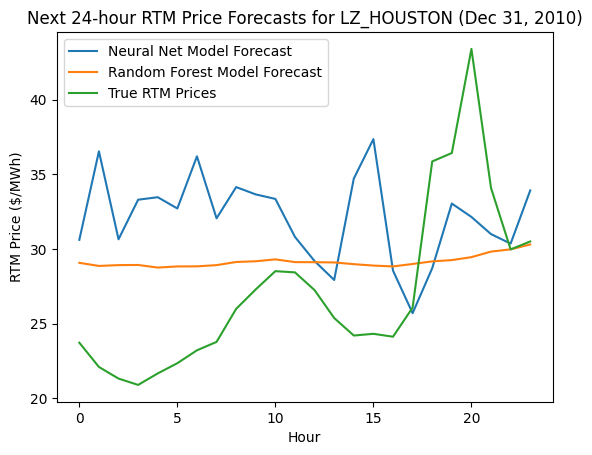

In [41]:
import matplotlib.pyplot as plt

plt.plot(range(24), next_24_forecast, label="Neural Net Model Forecast")
plt.plot(range(24), y_last_pred[0], label="Random Forest Model Forecast")
plt.plot(range(24), rtm_hourly_true[:24]["RTM"], label="True RTM Prices")
plt.xlabel("Hour")
plt.ylabel("RTM Price ($/MWh)")
plt.title("Next 24-hour RTM Price Forecasts for LZ_HOUSTON (Dec 31, 2010)")
plt.legend()
plt.show()